In [10]:
# libraries to import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Business Understanding


## Business Understanding  

Predicting oil prices in China is a crucial task for businesses, policymakers, and investors, as oil is a key driver of economic activity and industrial growth. Various macroeconomic, environmental, and financial factors influence oil price fluctuations. The goal of this project is to develop a predictive model using relevant features to estimate future oil prices in China.  

### Business Objective  
- **Goal:** Accurately predict the price of oil in China based on economic, financial, and environmental indicators.  
- **Stakeholders:** Oil companies, investors, policymakers, economists, and energy sector businesses.  
- **Impact:**  
  - Helps businesses optimize procurement and investment decisions.  
  - Assists policymakers in managing energy policies and price stability.  
  - Supports financial institutions in assessing risks and making informed trading decisions.  

---

### Feature Justification  

| Feature | Description | Relevance to Oil Price Prediction |
|---------|------------|----------------------------------|
| **Date** | The timestamp of the data entry. | Helps capture trends, seasonality, and historical patterns. |
| **Indice des actions (Stock Index)** | A measure of stock market performance. | Reflects economic health, investor sentiment, and demand for commodities like oil. |
| **Température (Temperature)** | The average temperature in China. | Cold weather increases oil demand for heating, while hot weather affects electricity and transportation needs. |
| **Émission CO2 (CO2 Emissions)** | The total CO2 emissions from industrial and transportation activities. | High emissions indicate high energy consumption, which may correlate with oil demand. |
| **Émission CO2.1 (CO2 Emissions - Alternative Measurement)** | Possibly a different source or method of calculating CO2 emissions. | Provides additional validation of energy consumption trends. |
| **Chinese Yuan to US $ (Exchange Rate)** | The exchange rate between the Chinese Yuan (CNY) and the US Dollar (USD). | Affects the cost of importing oil, as oil is priced in USD. A weaker yuan makes oil more expensive in China. |
| **Taux d'intérêt (Interest Rate)** | The benchmark interest rate set by the central bank. | Higher interest rates slow economic growth and reduce oil demand, while lower rates encourage borrowing and industrial expansion. |
| **Prix du pétrole (Oil Price)** | The dependent variable (target) we aim to predict. | Historical oil prices help in trend analysis and forecasting. |

---

### Challenges & Considerations
1. **Data Quality & Availability:** Ensuring that all features are consistently recorded and free from missing values or errors.  
2. **Seasonality & External Shocks:** Unexpected events like global crises, geopolitical tensions, or extreme weather can impact oil prices.  
3. **Feature Correlation:** Some variables (e.g., CO2 emissions and temperature) may have complex relationships that need careful modeling.  
4. **Economic Policies & Regulations:** Government interventions, such as subsidies or trade restrictions, can influence oil prices independently of the listed features.  

---

### Conclusion
By leveraging these macroeconomic, financial, and environmental indicators, we aim to build a robust model that provides accurate and actionable oil price predictions for China. This will enable stakeholders to make data-driven decisions in a volatile energy market. 🚀


# Data Understanding

In [11]:
# sheet name = 0 to choose the chinese data
df = pd.read_excel('Données.xlsx',sheet_name=0 )

In [3]:
df.head()

,date,Indice des actions,Température,Emission CO2,Emission CO2.1,Chinese Yuan to US $,Taux d'intérêt,Prix du pétrole
0,date,PCH,TCH,CO2CH exprimés en Millions,CO2CH,CHUS,ICH,Oil
1,2019-01-01 00:00:00,2611.38,2.79,32.344424,32344423.8,6.8785,3.273,50.57
2,2019-01-02 00:00:00,2581.37,3.23,31.791466,31791466.3,6.862,3.203,54.06
3,2019-01-03 00:00:00,2580.43,6.2,30.711864,30711863.9,6.87205,3.191,53.23
4,2019-01-04 00:00:00,2633.35,8.87,31.512141,31512141,6.8692,3.198,55.64


In [8]:
# check the features types
df.dtypes

date                    object
Indice des actions      object
Température             object
Emission CO2            object
Emission CO2.1          object
Chinese Yuan to US $    object
Taux d'intérêt          object
Prix du pétrole         object
dtype: object

In [9]:
# check for null values
df.isnull().sum().sort_values(ascending = False)

date                    0
Indice des actions      0
Température             0
Emission CO2            0
Emission CO2.1          0
Chinese Yuan to US $    0
Taux d'intérêt          0
Prix du pétrole         0
dtype: int64

## Notes
* **drop the first row**
* **we need to change the types of this columuns `[Indice des actions, Température, Emission CO2, Chinese Yuan to US, Chinese Yuan to US $, Taux d'intérêt, Prix du pétrole]` to `float`**
* **choose to drop one feature between `Emission CO2` and `Emission CO2.1 ` to avoid repetition**
* **boxplots for features to see the outliers**

# Data Cleaning

* drop the first row

In [13]:
df.drop(0, inplace=True)

In [14]:
df.head()

,date,Indice des actions,Température,Emission CO2,Emission CO2.1,Chinese Yuan to US $,Taux d'intérêt,Prix du pétrole
1,2019-01-01 00:00:00,2611.38,2.79,32.344424,32344423.8,6.8785,3.273,50.57
2,2019-01-02 00:00:00,2581.37,3.23,31.791466,31791466.3,6.862,3.203,54.06
3,2019-01-03 00:00:00,2580.43,6.2,30.711864,30711863.9,6.87205,3.191,53.23
4,2019-01-04 00:00:00,2633.35,8.87,31.512141,31512141,6.8692,3.198,55.64
5,2019-01-07 00:00:00,2652.396,6.64,31.356248,31356248.3,6.851,3.169,57.1


* change the types of the columuns

In [18]:
# columuns = [Indice des actions, Température, Emission CO2, Chinese Yuan to US, Chinese Yuan to US $, Taux d'intérêt, Prix du pétrole]
columns = df.columns[1:]

In [22]:
for c in columns:
    df[c] = df[c].astype(float)

In [23]:
df.dtypes

date                     object
Indice des actions      float64
Température             float64
Emission CO2            float64
Emission CO2.1          float64
Chinese Yuan to US $    float64
Taux d'intérêt          float64
Prix du pétrole         float64
dtype: object

* boxplots for features to see the outliers 

C:\Users\micro\AppData\Local\Temp\ipykernel_10748\3162043954.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df, labels=columns)  # Boxplot with labels


ValueError: Dimensions of labels and X must be compatible

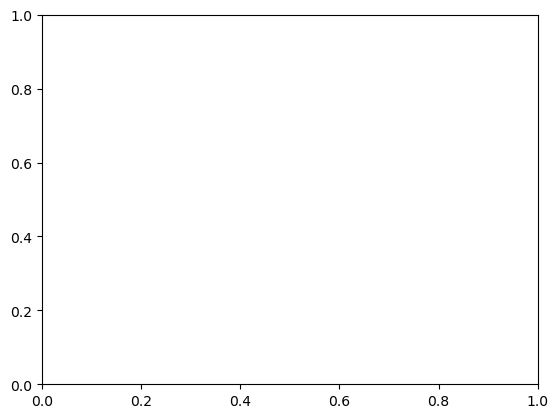

In [41]:
plt.boxplot(df, labels=columns)  # Boxplot with labels
plt.title("Boxplot of Different Features")
plt.ylabel("Value")
plt.grid(True)
plt.show()